<a href="https://colab.research.google.com/github/anicolaou718/Brain-Cancer/blob/main/Brain_Cancer_Glioblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
#import pandas as pd
#tsv_file='difg_glass_clinical_data.tsv'

# reading given tsv file
#csv_table=pd.read_table(tsv_file,sep='\t')

# converting tsv file into csv
#csv_table.to_csv('difg_glass_clinical_data.csv',index=False)

In [278]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [171]:
df = pd.read_csv('difg_glass_clinical_data.csv')
df.head()

,Study ID,Patient ID,Sample ID,Age,Analysis Type,Aklylating Agents Treatment,Cancer Type,Cancer Type Detailed,Project ID,Codeletion Status,...,Surgery Type,Tissue Source,Concurrent TMZ Treatment,Radiation Dose,Radiotherapy Treatment,TMZ Treatment,TMZ Treatment Cycles,6 TMZ Treatment Cycles,Tumor Classification,Tumor Grade
0,difg_glass,GLSS-19-0266,GLSS-19-0266-R1,71.0,WXS,No,Glioma,Glioblastoma,GLSS,NaN,...,Craniotomy,Case Western Reserve University,No,NaN,No,No,NaN,NaN,"Glioblastoma, IDH-wildtype",IV
1,difg_glass,GLSS-19-0266,GLSS-19-0266-TP,71.0,WXS,Yes,Glioma,Glioblastoma,GLSS,NaN,...,Craniotomy,Case Western Reserve University,Yes,60.0,Yes,Yes,12.0,Yes,"Glioblastoma, IDH-wildtype",IV
2,difg_glass,GLSS-19-0267,GLSS-19-0267-R1,61.0,"WXS, RNA",No,Glioma,Glioblastoma,GLSS,NaN,...,Craniotomy,Case Western Reserve University,No,NaN,No,No,NaN,NaN,"Glioblastoma, NOS",IV
3,difg_glass,GLSS-19-0267,GLSS-19-0267-TP,61.0,"WXS, RNA",Yes,Glioma,Glioblastoma,GLSS,NaN,...,Craniotomy,Case Western Reserve University,Yes,60.0,Yes,Yes,5.0,No,"Glioblastoma, NOS",IV
4,difg_glass,GLSS-19-0268,GLSS-19-0268-R1,64.0,"WXS, RNA",No,Glioma,Glioblastoma,GLSS,NaN,...,Craniotomy,Case Western Reserve University,No,NaN,No,No,NaN,NaN,"Glioblastoma, NOS",IV


In [172]:
df.shape

(693, 43)

In [173]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age', 'Analysis Type',
       'Aklylating Agents Treatment', 'Cancer Type', 'Cancer Type Detailed',
       'Project ID', 'Codeletion Status', 'DNA Aliquot Barcode',
       'ESTIMATE Score', 'Fraction Genome Altered', 'Histology',
       'IDH and Codeletion Status', 'IDH Status', 'Immune Score',
       'MGMT Methylation', 'MGMT Methylation Method', 'Mutation Count',
       'Oncotree Code', 'Overall Survival (months)', 'Overall Survival',
       'Purity', 'RNA Aliquot Barcode', 'Number of Samples Per Patient',
       'Sample Type', 'Sex', 'Stromal Score', 'Surgery Extent of Resection',
       'Surgery Indication', 'Surgery Laterality', 'Surgery Location',
       'Surgery Type', 'Tissue Source', 'Concurrent TMZ Treatment',
       'Radiation Dose', 'Radiotherapy Treatment', 'TMZ Treatment',
       'TMZ Treatment Cycles', '6 TMZ Treatment Cycles',
       'Tumor Classification', 'Tumor Grade'],
      dtype='object')

In [174]:
df.duplicated().sum()

0

In [175]:
df.isnull().sum()

Study ID                           0
Patient ID                         0
Sample ID                          0
Age                               30
Analysis Type                      0
Aklylating Agents Treatment      216
Cancer Type                        0
Cancer Type Detailed               0
Project ID                         0
Codeletion Status                 97
DNA Aliquot Barcode               64
ESTIMATE Score                   338
Fraction Genome Altered           64
Histology                         32
IDH and Codeletion Status          3
IDH Status                        77
Immune Score                     338
MGMT Methylation                 376
MGMT Methylation Method          392
Mutation Count                    68
Oncotree Code                      0
Overall Survival (months)         32
Overall Survival                  30
Purity                           338
RNA Aliquot Barcode              338
Number of Samples Per Patient      0
Sample Type                        0
S

In [176]:
df.drop(columns=['Surgery Indication'], inplace = True)

In [177]:
df['TMZ Treatment'].value_counts()

Yes    280
No     195
Name: TMZ Treatment, dtype: int64

Transform Objects with Nulls to numeric values

In [178]:
df.value_counts('Histology',dropna=False)

Histology
Glioblastoma         467
Astrocytoma           88
Oligodendroglioma     68
Oligoastrocytoma      36
NaN                   32
Gliosarcoma            2
dtype: int64

In [179]:
df.value_counts('Codeletion Status',dropna=False)

Codeletion Status
noncodel    531
NaN          97
codel        65
dtype: int64

In [180]:
df.value_counts('IDH and Codeletion Status',dropna=False)

IDH and Codeletion Status
IDHwt              439
IDHmut-noncodel    184
IDHmut-codel        67
NaN                  3
dtype: int64

In [181]:
df.value_counts('IDH Status',dropna=False)

IDH Status
IDHwt     369
IDHmut    247
NaN        77
dtype: int64

In [182]:
df.value_counts('MGMT Methylation',dropna=False)

MGMT Methylation
NaN             376
Methylated      176
Unmethylated    141
dtype: int64

In [183]:
df.value_counts('Overall Survival',dropna=False)

Overall Survival
1:DECEASED    499
0:LIVING      164
NaN            30
dtype: int64

In [184]:
df.value_counts('Sex',dropna=False)

Sex
Male      434
Female    229
NaN        30
dtype: int64

In [185]:
df.value_counts('Surgery Extent of Resection',dropna=False)

Surgery Extent of Resection
NaN         390
Total       163
Subtotal    136
Biopsy        4
dtype: int64

In [186]:
df.value_counts('Surgery Laterality',dropna=False)

Surgery Laterality
NaN      312
Right    203
Left     176
Both       2
dtype: int64

In [187]:
df.value_counts('Surgery Location',dropna=False)

Surgery Location
NaN                       292
Frontal lobe              150
Temporal lobe             123
Parietal lobe              56
Occipital lobe             22
Insular lobe               15
Fronto-Parietal lobe       11
Fronto-Temporal lobe        7
Frontoparietal              3
Multifocal                  3
Cerebellum                  2
Corpus callosum             2
Frontal                     2
Parieto-Occipital lobe      2
Temporo-Occipital lobe      2
Occipitial lobe             1
dtype: int64

In [188]:
df.value_counts('Tumor Classification', dropna= False)

Tumor Classification
Glioblastoma, IDH-wildtype                                       309
Diffuse Astrocytoma, IDH-mutant                                   78
Glioblastoma, NOS                                                 62
Glioblastoma, IDH-mutant                                          57
Oligodendroglioma, IDH-mutant and 1p/19q-codeleted                40
NaN                                                               36
Anaplastic Astrocytoma, IDH-mutant                                35
Glioblastoma, IDHwt                                               27
Anaplastic Oligodendroglioma, IDH-mutant and 1p/19q-codeleted     17
Anaplastic Astrocytoma, IDH-wildtype                               9
Glioblastoma, IDH-mutant and 1p/19q-codeleted                      8
Astrocytoma, IDH-mutant                                            6
Oligoastrocytoma, IDH-mutant                                       3
Astrocytoma, IDH-wildtype                                          1
Anaplastic Ol

In [189]:
df.drop(columns = ['RNA Aliquot Barcode','Surgery Extent of Resection','Surgery Type',
'MGMT Methylation Method','DNA Aliquot Barcode','Tissue Source'], inplace = True)

In [190]:
df.value_counts('IDH Status', dropna = False)

IDH Status
IDHwt     369
IDHmut    247
NaN        77
dtype: int64

In [191]:
df.value_counts('Codeletion Status', dropna = False)

Codeletion Status
noncodel    531
NaN          97
codel        65
dtype: int64

In [192]:
df.pop('Codeletion Status')

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
688    noncodel
689    noncodel
690    noncodel
691    noncodel
692    noncodel
Name: Codeletion Status, Length: 693, dtype: object

In [193]:
df.pop('IDH Status')

0       IDHwt
1       IDHwt
2         NaN
3         NaN
4         NaN
        ...  
688    IDHmut
689    IDHmut
690    IDHmut
691    IDHmut
692    IDHmut
Name: IDH Status, Length: 693, dtype: object

In [194]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age', 'Analysis Type',
       'Aklylating Agents Treatment', 'Cancer Type', 'Cancer Type Detailed',
       'Project ID', 'ESTIMATE Score', 'Fraction Genome Altered', 'Histology',
       'IDH and Codeletion Status', 'Immune Score', 'MGMT Methylation',
       'Mutation Count', 'Oncotree Code', 'Overall Survival (months)',
       'Overall Survival', 'Purity', 'Number of Samples Per Patient',
       'Sample Type', 'Sex', 'Stromal Score', 'Surgery Laterality',
       'Surgery Location', 'Concurrent TMZ Treatment', 'Radiation Dose',
       'Radiotherapy Treatment', 'TMZ Treatment', 'TMZ Treatment Cycles',
       '6 TMZ Treatment Cycles', 'Tumor Classification', 'Tumor Grade'],
      dtype='object')

In [195]:
df.value_counts('IDH and Codeletion Status', dropna = False)

IDH and Codeletion Status
IDHwt              439
IDHmut-noncodel    184
IDHmut-codel        67
NaN                  3
dtype: int64

In [196]:
df.value_counts('Overall Survival', dropna = True)

Overall Survival
1:DECEASED    499
0:LIVING      164
dtype: int64

In [197]:
df.value_counts('Tumor Grade', dropna = True)

Tumor Grade
IV     470
II     125
III     66
dtype: int64

In [198]:
df.drop(columns='Tumor Classification', inplace = True)

In [199]:
df.value_counts('Sex', dropna = True)

Sex
Male      434
Female    229
dtype: int64

In [200]:
df.select_dtypes(include=object).isnull().sum()>1

Study ID                       False
Patient ID                     False
Sample ID                      False
Analysis Type                  False
Aklylating Agents Treatment     True
Cancer Type                    False
Cancer Type Detailed           False
Project ID                     False
Histology                       True
IDH and Codeletion Status       True
MGMT Methylation                True
Oncotree Code                  False
Overall Survival                True
Sample Type                    False
Sex                             True
Surgery Laterality              True
Surgery Location                True
Concurrent TMZ Treatment        True
Radiotherapy Treatment          True
TMZ Treatment                   True
6 TMZ Treatment Cycles          True
Tumor Grade                     True
dtype: bool

In [201]:
df.value_counts('Tumor Grade', dropna = True)

Tumor Grade
IV     470
II     125
III     66
dtype: int64

In [202]:
df.replace('No', 0, inplace = True)

In [203]:
df.replace({'IV':4, 'II':2, 'III':3}, inplace = True)

In [204]:
df.replace('Yes', 1, inplace=True)

In [205]:
df.shape

(693, 33)

In [206]:
df.select_dtypes(include=object).isnull().sum()

Study ID                       0
Patient ID                     0
Sample ID                      0
Analysis Type                  0
Cancer Type                    0
Cancer Type Detailed           0
Project ID                     0
Histology                     32
IDH and Codeletion Status      3
MGMT Methylation             376
Oncotree Code                  0
Overall Survival              30
Sample Type                    0
Sex                           30
Surgery Laterality           312
Surgery Location             292
dtype: int64

In [207]:
# Drop columns with mostly NA values
df.drop(columns = ['MGMT Methylation','Surgery Laterality','Surgery Location','Cancer Type'], inplace = True)

In [208]:
df.value_counts('Sample Type', dropna = True)

Sample Type
First Recurrence     318
Tumor Primary        309
Second Recurrence     49
Third Recurrence      14
Fourth recurrence      2
First Metastasis       1
dtype: int64

In [209]:
df.select_dtypes(include= np.number).isnull().sum()>1

Age                               True
Aklylating Agents Treatment       True
ESTIMATE Score                    True
Fraction Genome Altered           True
Immune Score                      True
Mutation Count                    True
Overall Survival (months)         True
Purity                            True
Number of Samples Per Patient    False
Stromal Score                     True
Concurrent TMZ Treatment          True
Radiation Dose                    True
Radiotherapy Treatment            True
TMZ Treatment                     True
TMZ Treatment Cycles              True
6 TMZ Treatment Cycles            True
Tumor Grade                       True
dtype: bool

In [210]:
df.select_dtypes(include= np.number).columns

Index(['Age', 'Aklylating Agents Treatment', 'ESTIMATE Score',
       'Fraction Genome Altered', 'Immune Score', 'Mutation Count',
       'Overall Survival (months)', 'Purity', 'Number of Samples Per Patient',
       'Stromal Score', 'Concurrent TMZ Treatment', 'Radiation Dose',
       'Radiotherapy Treatment', 'TMZ Treatment', 'TMZ Treatment Cycles',
       '6 TMZ Treatment Cycles', 'Tumor Grade'],
      dtype='object')

In [211]:
X = ['Age', 'Aklylating Agents Treatment', 'ESTIMATE Score',
       'Fraction Genome Altered', 'Immune Score', 'Mutation Count',
       'Overall Survival (months)', 'Overall Survival', 'Purity',
        'Sex', 'Stromal Score',       'Concurrent TMZ Treatment',
        'Radiation Dose', 'Radiotherapy Treatment',
       'TMZ Treatment', 'TMZ Treatment Cycles', '6 TMZ Treatment Cycles',
       'Tumor Grade']

Handling Nulls: Dropping Columns, Filling with mean/median, Using KNN, Predictive Mean Matching, Dropping All Nulls

Investigating TMZ and Radiation Nulls

In [212]:
df['IDH and Codeletion Status'].fillna(df['IDH and Codeletion Status'].mode()[0],inplace=True)
df.replace('1:DECEASED',1,inplace=True)
df.replace('0:LIVING',0, inplace=True)
df.replace('Male',1,inplace=True)
df.replace('Female',0, inplace=True)
df.replace(['Occipitial lobe','Temporo-Occipital lobe ','Parieto-Occipital lobe'],'Frontal lobe',inplace=True)
df.replace(['Fronto-Temporal lobe','Fronto-Parietal lobe', 'Frontoparietal','Frontal'],'Frontal lobe', inplace=True)
df.replace(['Temporo-Occipital lobe'],'Occipital lobe', inplace=True)

In [213]:
df.loc[df['Concurrent TMZ Treatment'] == 'Yes', 'TMZ Treatment'] = 'Yes'

In [214]:
df.loc[df['TMZ Treatment'] == 'No', '6 TMZ Treatment Cycles'] = 'No'

In [215]:
df.loc[df['TMZ Treatment'] == 'No', 'TMZ Treatment Cycles'] = 0.0

In [216]:
df.loc[df['TMZ Treatment'] == 'No', 'Concurrent TMZ Treatment'] = 'No'

In [217]:
df.loc[df['Radiotherapy Treatment'] == 'No', 'Radiation Dose'] = 0.0

In [218]:
df1 = df[df['Sample ID'].str.contains('R1')]
df2 = df[df['Sample ID'].str.contains('TP')]

In [219]:
#filling Nulls using KNN
imputer = KNNImputer()
# fit on the dataset
imputer = KNNImputer(n_neighbors=2)
# transform the dataset
Y = imputer.fit_transform(df[X])
# print total missing
df[X] = Y
df.isnull().sum()
df.dropna(inplace=True)

In [220]:
df.loc[:,df.isnull().sum()>1].columns

Index([], dtype='object')

In [221]:
z = df.select_dtypes(include=object).columns

In [222]:
df['Analysis Type'].value_counts()

WXS         247
WXS, RNA    190
WGS, RNA    101
RNA          64
WGS          59
Name: Analysis Type, dtype: int64

In [223]:
df['Sample Type'].value_counts()

First Recurrence     301
Tumor Primary        294
Second Recurrence     49
Third Recurrence      14
Fourth recurrence      2
First Metastasis       1
Name: Sample Type, dtype: int64

In [224]:
df_encoded = pd.get_dummies(df, columns= ['IDH and Codeletion Status', 'Cancer Type Detailed','Sample Type', 'Analysis Type', 'Histology' ])

In [225]:
df_encoded.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age',
       'Aklylating Agents Treatment', 'Project ID', 'ESTIMATE Score',
       'Fraction Genome Altered', 'Immune Score', 'Mutation Count',
       'Oncotree Code', 'Overall Survival (months)', 'Overall Survival',
       'Purity', 'Number of Samples Per Patient', 'Sex', 'Stromal Score',
       'Concurrent TMZ Treatment', 'Radiation Dose', 'Radiotherapy Treatment',
       'TMZ Treatment', 'TMZ Treatment Cycles', '6 TMZ Treatment Cycles',
       'Tumor Grade', 'IDH and Codeletion Status_IDHmut-codel',
       'IDH and Codeletion Status_IDHmut-noncodel',
       'IDH and Codeletion Status_IDHwt',
       'Cancer Type Detailed_Anaplastic Astrocytoma',
       'Cancer Type Detailed_Anaplastic Oligoastrocytoma',
       'Cancer Type Detailed_Anaplastic Oligodendroglioma',
       'Cancer Type Detailed_Astrocytoma',
       'Cancer Type Detailed_Diffuse Astrocytoma',
       'Cancer Type Detailed_Glioblastoma',
       'Cancer Type Detailed_Oligodendro

<ipython-input-226-be53dea72c6e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

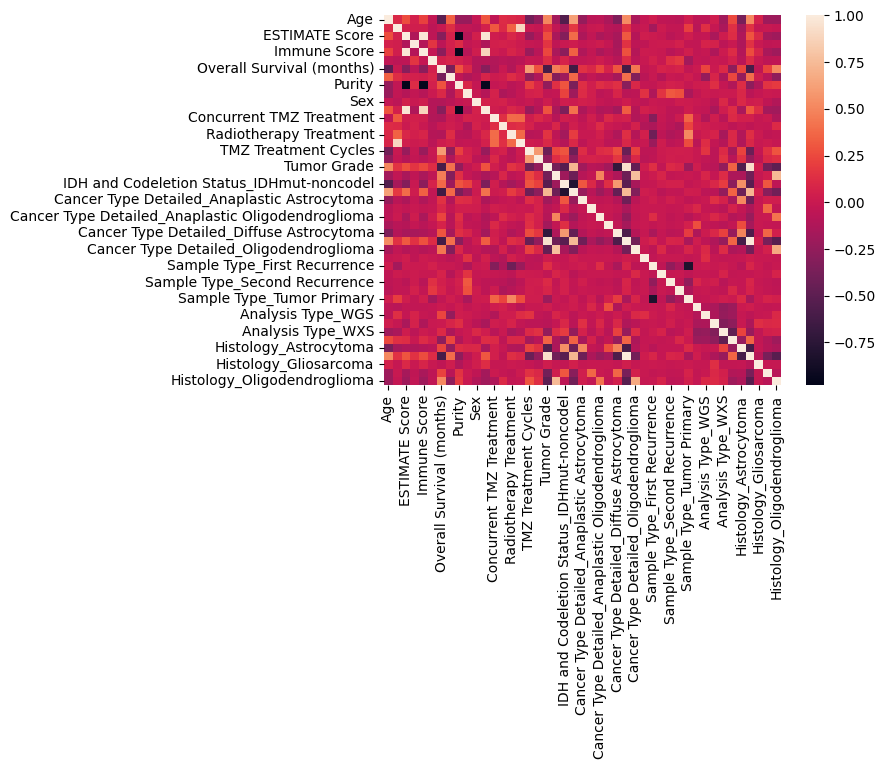

In [226]:
sns.heatmap(df_encoded.corr())

In [227]:
df.describe()

,Age,Aklylating Agents Treatment,ESTIMATE Score,Fraction Genome Altered,Immune Score,Mutation Count,Overall Survival (months),Overall Survival,Purity,Number of Samples Per Patient,Sex,Stromal Score,Concurrent TMZ Treatment,Radiation Dose,Radiotherapy Treatment,TMZ Treatment,TMZ Treatment Cycles,6 TMZ Treatment Cycles,Tumor Grade
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,47.039334,0.633132,-153.343835,0.162965,389.035453,187.354766,50.524962,0.751891,0.815292,2.175492,0.653555,-542.379288,0.611952,53.310893,0.458396,0.577156,7.950076,0.697428,3.521936
std,14.237753,0.450226,1365.870288,0.126717,777.930105,651.096569,45.533252,0.432242,0.111137,0.476164,0.476197,631.528289,0.404923,11.642598,0.494065,0.461495,4.996567,0.388247,0.792896
min,19.000000,0.000000,-4890.101419,0.000000,-2191.125574,1.000000,5.000000,0.000000,0.273586,2.000000,0.000000,-2698.975845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,35.000000,0.000000,-1059.474041,0.078200,-153.082314,31.000000,18.000000,1.000000,0.754553,2.000000,0.000000,-993.439106,0.500000,47.500000,0.000000,0.000000,5.000000,0.500000,3.000000
50%,48.000000,1.000000,-97.307828,0.148500,409.286022,51.000000,34.000000,1.000000,0.824343,2.000000,1.000000,-559.361999,0.500000,58.000000,0.000000,1.000000,7.000000,1.000000,4.000000
75%,58.000000,1.000000,735.358270,0.211800,899.852811,74.000000,64.000000,1.000000,0.897963,2.000000,1.000000,-100.849385,1.000000,60.000000,1.000000,1.000000,10.500000,1.000000,4.000000
max,82.000000,1.000000,4691.721374,0.912800,3323.500588,10067.000000,293.000000,1.000000,0.994237,5.000000,1.000000,1575.458162,1.000000,180.000000,1.000000,1.000000,42.000000,1.000000,4.000000


In [228]:
z = df_encoded.select_dtypes(include = np.number).mean() + (df_encoded.select_dtypes(include = np.number).std() *3)

In [229]:

i = 0
while i != 45:
  if df_encoded.select_dtypes(include = np.number).max()[i] > z[i]:
    print (i)
  i+=1


2
3
4
5
6
9
11
13
16
19
22
23
24
25
28
29
31
32
33
35
36
42
43


Handling Outliers

In [230]:
def find_outliers(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

   return outliers

In [231]:
outliers = find_outliers(df_encoded.select_dtypes(include = np.number))
print('number of outlier in the datA: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outlier in the datA: 661
max outlier value: Age                                                           NaN
Aklylating Agents Treatment                                   NaN
ESTIMATE Score                                        4691.721374
Fraction Genome Altered                                  0.912800
Immune Score                                          3323.500588
Mutation Count                                       10067.000000
Overall Survival (months)                              293.000000
Overall Survival                                         0.000000
Purity                                                   0.538886
Number of Samples Per Patient                            5.000000
Sex                                                           NaN
Stromal Score                                         1575.458162
Concurrent TMZ Treatment                                      NaN
Radiation Dose                                         180.000000
Radiotherapy Treatment

In [232]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 692
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Study ID                                           661 non-null    object 
 1   Patient ID                                         661 non-null    object 
 2   Sample ID                                          661 non-null    object 
 3   Age                                                661 non-null    float64
 4   Aklylating Agents Treatment                        661 non-null    float64
 5   Project ID                                         661 non-null    object 
 6   ESTIMATE Score                                     661 non-null    float64
 7   Fraction Genome Altered                            661 non-null    float64
 8   Immune Score                                       661 non-null    float64
 9   Mutation C

In [233]:
x = []
for i in df_encoded.select_dtypes(include=np.float64):
  if (df_encoded[i].mean() +(df_encoded[i].std()*3))< df_encoded[i].max():
    x.append(i)
    print('MAX: ', i , ' : ' ,df_encoded[i].mean() +(df_encoded[i].std()*3), '  ' , df_encoded[i].max())
  if (df_encoded[i].mean() -(df_encoded[i].std()*3))> df_encoded[i].min():
    x.append(i)
    print('Min: ', i , ' : ', df_encoded[i].mean() - (df_encoded[i].std()*3), '  ' , df_encoded[i].min())

MAX:  ESTIMATE Score  :  3944.267029601746    4691.72137365075
Min:  ESTIMATE Score  :  -4250.95470016107    -4890.10141879675
MAX:  Fraction Genome Altered  :  0.5431168758187279    0.9128
MAX:  Immune Score  :  2722.8257677367365    3323.50058849527
Min:  Immune Score  :  -1944.7548613565634    -2191.12557385595
MAX:  Mutation Count  :  2140.644471562706    10067.0
MAX:  Overall Survival (months)  :  187.1247178413523    293.0
Min:  Purity  :  0.48188213440543975    0.273585561762932
MAX:  Stromal Score  :  1352.2055796571592    1575.45816229976
Min:  Stromal Score  :  -2436.9641565966567    -2698.9758449408
MAX:  Radiation Dose  :  88.23868529241638    180.0
Min:  Radiation Dose  :  18.383099881562444    0.0
MAX:  TMZ Treatment Cycles  :  22.939777788203806    42.0


In [234]:
x = set(x)

In [235]:
df_encoded.describe()

,Age,Aklylating Agents Treatment,ESTIMATE Score,Fraction Genome Altered,Immune Score,Mutation Count,Overall Survival (months),Overall Survival,Purity,Number of Samples Per Patient,...,Analysis Type_RNA,Analysis Type_WGS,"Analysis Type_WGS, RNA",Analysis Type_WXS,"Analysis Type_WXS, RNA",Histology_Astrocytoma,Histology_Glioblastoma,Histology_Gliosarcoma,Histology_Oligoastrocytoma,Histology_Oligodendroglioma
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,...,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,47.039334,0.633132,-153.343835,0.162965,389.035453,187.354766,50.524962,0.751891,0.815292,2.175492,...,0.096823,0.089259,0.152799,0.373676,0.287443,0.133132,0.706505,0.003026,0.054463,0.102874
std,14.237753,0.450226,1365.870288,0.126717,777.930105,651.096569,45.533252,0.432242,0.111137,0.476164,...,0.295941,0.285333,0.360066,0.484146,0.452913,0.339974,0.455708,0.054965,0.227101,0.304025
min,19.000000,0.000000,-4890.101419,0.000000,-2191.125574,1.000000,5.000000,0.000000,0.273586,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,-1059.474041,0.078200,-153.082314,31.000000,18.000000,1.000000,0.754553,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,-97.307828,0.148500,409.286022,51.000000,34.000000,1.000000,0.824343,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,1.000000,735.358270,0.211800,899.852811,74.000000,64.000000,1.000000,0.897963,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,82.000000,1.000000,4691.721374,0.912800,3323.500588,10067.000000,293.000000,1.000000,0.994237,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
upper_limit = df_encoded['ESTIMATE Score'].mean() + 3*df_encoded['ESTIMATE Score'].std()
lower_limit = df_encoded['ESTIMATE Score'].mean() - 3*df_encoded['ESTIMATE Score'].std()

In [237]:
df_encoded['ESTIMATE Score'] = np.where( df_encoded['ESTIMATE Score'] > upper_limit, upper_limit,np.where( df_encoded['ESTIMATE Score'] < lower_limit,lower_limit,  df_encoded['ESTIMATE Score']   ))

In [238]:
#Capping Values
for i in x:
  upper_limit = df_encoded[i].mean() + 3*df_encoded[i].std()

  print(upper_limit)

  lower_limit = df_encoded[i].mean() - 3*df_encoded[i].std()

  print(lower_limit)
  df_encoded[i] = np.where( df_encoded[i] > upper_limit, upper_limit,np.where( df_encoded[i] < lower_limit,lower_limit,  df_encoded[i]   ))

187.1247178413523
-86.0747934843175
2722.8257677367365
-1944.7548613565634
1.1487027414487188
0.48188213440543975
0.5431168758187279
-0.21718631606078537
1352.2055796571592
-2436.9641565966567
3923.533965105778
-4230.549344062722
22.939777788203806
-7.039626502273398
2140.644471562706
-1765.9349405490902
88.23868529241638
18.383099881562444


Visualization

In [239]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 692
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Study ID                                           661 non-null    object 
 1   Patient ID                                         661 non-null    object 
 2   Sample ID                                          661 non-null    object 
 3   Age                                                661 non-null    float64
 4   Aklylating Agents Treatment                        661 non-null    float64
 5   Project ID                                         661 non-null    object 
 6   ESTIMATE Score                                     661 non-null    float64
 7   Fraction Genome Altered                            661 non-null    float64
 8   Immune Score                                       661 non-null    float64
 9   Mutation C

<ipython-input-240-be53dea72c6e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

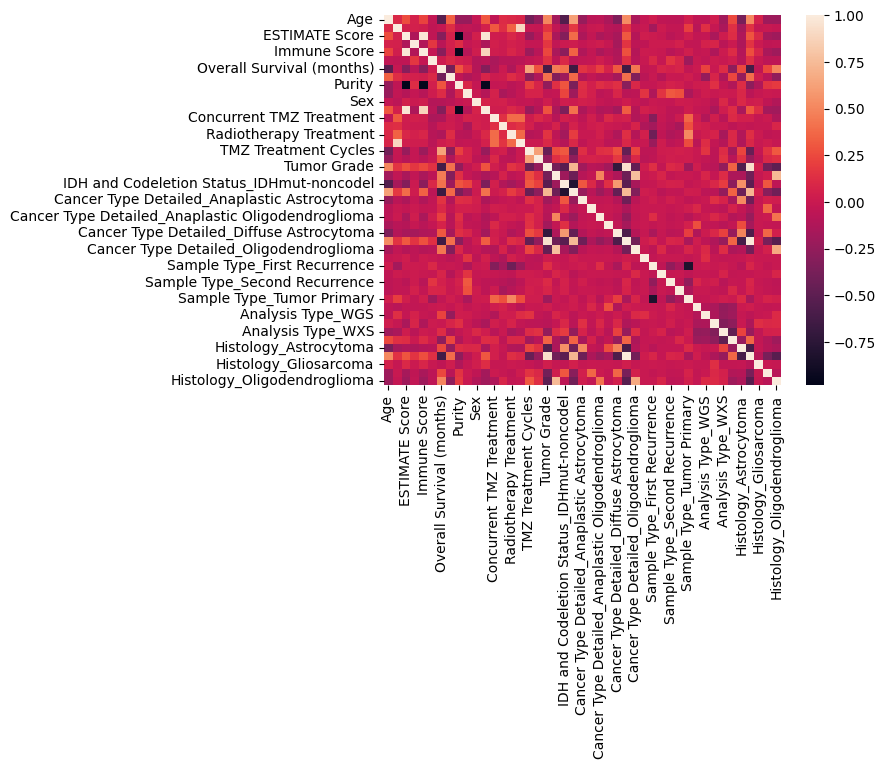

In [240]:
sns.heatmap(df_encoded.corr())

In [241]:
fig = px.scatter(df_encoded,x='Overall Survival (months)', y='Fraction Genome Altered')
fig.show()

In [242]:
fig = px.scatter(df_encoded,x="Mutation Count", y="Overall Survival (months)",
	         size="Tumor Grade", color="Age",
                 hover_name="TMZ Treatment Cycles", log_x=True, size_max=60)
fig.show()

In [243]:
fig = px.scatter(df_encoded,x="Mutation Count", y="Overall Survival (months)",
	         size="Age", color="Tumor Grade",
                 hover_name="TMZ Treatment Cycles", log_x=True, size_max=60)
fig.show()

In [244]:
fig = px.scatter(df_encoded,x="ESTIMATE Score", y="Overall Survival (months)",
	         size="Age", color="Tumor Grade",
                 hover_name="TMZ Treatment Cycles", log_x=True, size_max=60)
fig.show()

In [245]:
df_encoded.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age',
       'Aklylating Agents Treatment', 'Project ID', 'ESTIMATE Score',
       'Fraction Genome Altered', 'Immune Score', 'Mutation Count',
       'Oncotree Code', 'Overall Survival (months)', 'Overall Survival',
       'Purity', 'Number of Samples Per Patient', 'Sex', 'Stromal Score',
       'Concurrent TMZ Treatment', 'Radiation Dose', 'Radiotherapy Treatment',
       'TMZ Treatment', 'TMZ Treatment Cycles', '6 TMZ Treatment Cycles',
       'Tumor Grade', 'IDH and Codeletion Status_IDHmut-codel',
       'IDH and Codeletion Status_IDHmut-noncodel',
       'IDH and Codeletion Status_IDHwt',
       'Cancer Type Detailed_Anaplastic Astrocytoma',
       'Cancer Type Detailed_Anaplastic Oligoastrocytoma',
       'Cancer Type Detailed_Anaplastic Oligodendroglioma',
       'Cancer Type Detailed_Astrocytoma',
       'Cancer Type Detailed_Diffuse Astrocytoma',
       'Cancer Type Detailed_Glioblastoma',
       'Cancer Type Detailed_Oligodendro

In [247]:
fig = px.scatter_3d(df_encoded, x='Radiation Dose', y='Overall Survival (months)', z='Stromal Score',
                    color='Tumor Grade', symbol='Cancer Type Detailed_Glioblastoma')
fig.show()

In [255]:
fig = px.bar(df_encoded, x="Overall Survival (months)", y="Tumor Grade")
fig.show()

In [256]:
fig = px.scatter(df_encoded,x='Age', y='ESTIMATE Score')
fig.show()

In [257]:
fig = px.scatter(df_encoded,x='Overall Survival (months)', y='TMZ Treatment Cycles')
fig.show()

In [258]:
fig = px.histogram(df_encoded, x="Overall Survival (months)", nbins=20)
fig.show()

In [262]:
df_encoded[df_encoded['Overall Survival (months)'] > 36].shape

(309, 45)

In [263]:
df_encoded['3OS'] = 0

In [264]:
df_encoded['3OS'].where(df_encoded['Overall Survival (months)'] > 36, 1, inplace=True)

In [265]:
df_encoded['3OS'].value_counts()

1    352
0    309
Name: 3OS, dtype: int64

Feature Selection

In [266]:
df_encoded.drop(columns=['Study ID', 'Patient ID', 'Sample ID', 'Project ID', 'Oncotree Code'], inplace = True)

KeyError: "['Study ID', 'Patient ID', 'Sample ID', 'Project ID', 'Oncotree Code'] not found in axis"

In [267]:
X = df_encoded.drop(columns=['Overall Survival', 'Overall Survival (months)','3OS'])
y = df_encoded['Overall Survival (months)']

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Pearson Correlation Feature Selection

<Axes: >

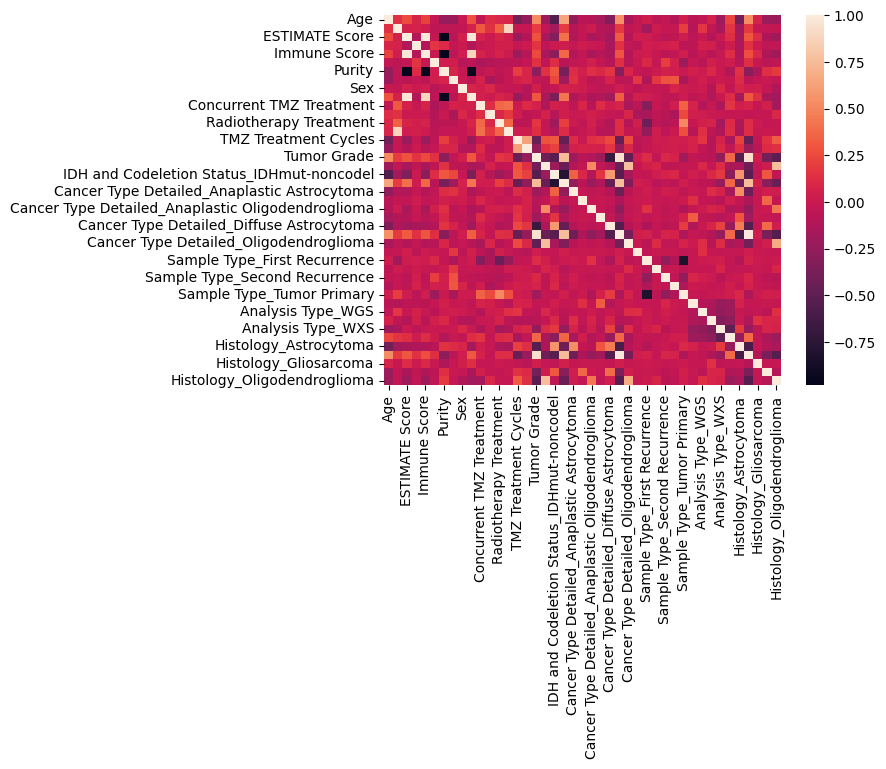

In [269]:
sns.heatmap(X_train.corr())

In [99]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [100]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

15

In [101]:
corr_features

{'Cancer Type Detailed_Anaplastic Astrocytoma',
 'Cancer Type Detailed_Anaplastic Oligoastrocytoma',
 'Cancer Type Detailed_Anaplastic Oligodendroglioma',
 'Cancer Type Detailed_Astrocytoma',
 'Cancer Type Detailed_Diffuse Astrocytoma',
 'Cancer Type Detailed_Glioblastoma',
 'Cancer Type Detailed_Oligodendroglioma',
 'Histology_Glioblastoma',
 'Histology_Oligodendroglioma',
 'IDH and Codeletion Status_IDHwt',
 'Immune Score',
 'Purity',
 'Sample Type_Tumor Primary',
 'Stromal Score',
 'TMZ Treatment'}

In [102]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [270]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [271]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [272]:
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ -6.96260053   0.73601626 -60.09112038  -1.6153346   31.18307365
   2.0728361    2.34618215  -0.47931815  -2.26185609  31.6905681
  -5.4789864   -0.30741956   2.02785955   4.28921509  17.11014611
  -4.15733486  -0.1221391    0.84293683   3.38519434  -3.63984963
   4.75549968   4.33094232   5.87463801   1.15427608   8.07682699
 -18.89084529  13.68607842  -1.4142765    0.08760327   1.25622744
   2.64246149   2.57194369  -2.16158558   1.07237836   3.04346835
  -0.76580096  -1.18908079  -0.77528862  -7.83445579  10.76045339
   0.90707335  -4.32125164  -4.29672206]
Variance score: 0.5841129990772763


PCA

In [273]:
log_y = np.log(y)

In [274]:
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'random_state' : [18]
}

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size = 0.2, random_state = 0)

In [289]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [290]:
pca = PCA(n_components = 40)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [291]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [292]:
y_pred = reg.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.6061243380003316


In [293]:
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 2.17499205e-01 -4.52318548e-02  3.67276063e-02  3.93514073e-02
  2.03110619e-01 -1.33463740e-03  4.78973730e-02  5.73804040e-02
 -1.32349021e-02 -2.77726619e-02 -4.83137211e-02 -1.81759312e-02
 -3.64140123e-02 -3.35562641e-03 -1.21515694e-02 -4.43216280e-03
 -1.86230221e-02 -7.94143767e-03 -3.11618586e-02 -5.79218675e-02
  1.97694826e-02  8.31849255e-02  2.58394943e-02  1.23859743e-02
 -1.32383617e-02 -8.69951574e-02  2.88726743e-02  7.94752204e-02
 -1.22598654e-02  4.52025531e-02 -1.59406028e-01 -7.76470812e-03
 -4.52663448e-02 -5.11111320e-02 -4.26182987e-01  8.42420653e-02
  3.55874426e-01 -5.63175382e-01  4.20912687e+12  1.18381693e+12]
Variance score: 0.6061243380003316


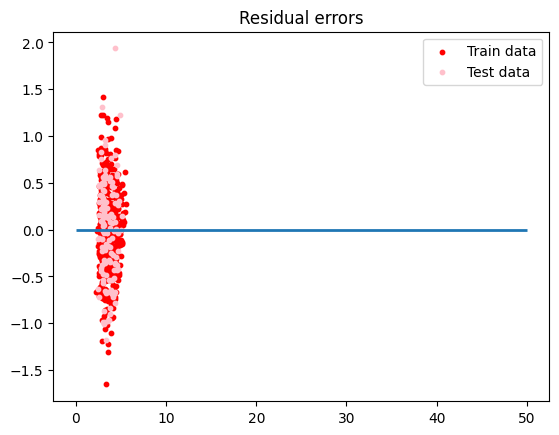

In [296]:
plt.scatter(reg.predict(X_train),
			reg.predict(X_train) - y_train,
			color="red", s=10,
			label='Train data')

plt.scatter(reg.predict(X_test),
			reg.predict(X_test) - y_test,
			color="pink", s=10,
			label='Test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

plt.legend(loc='upper right')
plt.title("Residual errors")

plt.show()


In [120]:
rf_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [121]:
y_pred = reg.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
rf_cv.score(X_test, y_test)

0.6072793494589316

In [122]:
rf_cv = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [123]:
y_pred = reg.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
rf_cv.score(X_test, y_test)

0.5969857267426606

RFE and GridSearch w/ CV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


*RFECV and Grid Search without FS

In [277]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

#this is the classifier used for feature selection
clf_featr_sele = RandomForestRegressor(n_estimators=30,
                                        random_state=42
                                        )
rfecv = RFECV(estimator=clf_featr_sele,
              step=1,
              cv=5,
              scoring = 'r2')
selector = rfecv.fit(X_train, y_train)

X_rfecv_train=selector.transform(X_train)
X_rfecv_test=selector.transform(X_test)

#you can have different classifier for your final classifier
clf = RandomForestRegressor(n_estimators=10,
                             random_state=42
                            )
CV_rfc = GridSearchCV(clf,
                      param_grid={'max_depth':[2,5]},
                      cv= 5, scoring = 'r2')\

pipeline  = Pipeline([('feature_sele',rfecv),
                      ('clf_cv',CV_rfc)])

pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([ 50.18007483,  73.89031594,  17.75952473,  30.55435441,
        24.68288026,  34.01149354,  38.18997811, 120.46582492,
        17.11351482,  21.5316577 ,  49.96395241,  17.75952473,
        70.34125606,  20.02697846,  29.04889258, 104.2709831 ,
        32.26685763,  18.92951011,  72.11219238, 104.69489262,
        34.10944052,  39.55636733,  18.12614513, 112.62662199,
        74.54583699,  62.64257523,  56.50830332,  40.72434167,
        46.48529474,  66.66188933,  19.12709946,  19.26821926,
        27.13271622,  34.80674309,  18.61469586,  20.95139454,
        96.45127389,  17.70323704,  43.88275983,  18.06568814,
        63.48743958,  48.1068607 ,  24.91413964, 141.48110034,
        21.08134828,  67.25787946,  72.93062955,  19.31910395,
        34.23283734,  93.17833217,  43.81100792,  25.20462276,
        30.4801299 ,  55.74938269,  22.38782097,  20.43116907,
        82.01879484, 121.06919988,  16.89570276,  77.10474676,
        18.06568814,  18.6879561 ,  24.15815493,  99.07

In [279]:
mean_absolute_error(y_test, CV_rfc.predict(X_rfecv_test))

15.828056892915612

In [280]:
y_test.mean()

46.8458878341676

In [281]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1, 10,  9,  1,  1, 12,  1,  2,  1,  5,  1, 13,
        1,  1,  1,  1,  1,  1,  8, 15,  1,  1,  7, 14,  6, 11,  4,  1,  1])

In [282]:
rfecv.estimator_.feature_importances_

array([0.04172631, 0.0024707 , 0.02394395, 0.01927724, 0.03120995,
       0.02849378, 0.015261  , 0.00804912, 0.00709642, 0.02900589,
       0.04656129, 0.10335879, 0.00132086, 0.00330663, 0.15116154,
       0.00585414, 0.00076216, 0.00410582, 0.00774084, 0.23432001,
       0.00109858, 0.0021408 , 0.1307518 , 0.00115201, 0.00181285,
       0.0036867 , 0.00346708, 0.00365158, 0.00899332, 0.0026509 ,
       0.00095466, 0.00158387, 0.00371167, 0.00218471, 0.00798979,
       0.05697816, 0.00216509])

Optimal number of features : 37
Best features : Index(['Age', 'Aklylating Agents Treatment', 'ESTIMATE Score',
       'Fraction Genome Altered', 'Immune Score', 'Mutation Count', 'Purity',
       'Number of Samples Per Patient', 'Sex', 'Stromal Score',
       'Concurrent TMZ Treatment', 'Radiation Dose', 'Radiotherapy Treatment',
       'TMZ Treatment', 'TMZ Treatment Cycles', '6 TMZ Treatment Cycles',
       'Tumor Grade', 'IDH and Codeletion Status_IDHmut-codel',
       'IDH and Codeletion Status_IDHmut-noncodel',
       'IDH and Codeletion Status_IDHwt',
       'Cancer Type Detailed_Anaplastic Oligoastrocytoma',
       'Cancer Type Detailed_Anaplastic Oligodendroglioma',
       'Cancer Type Detailed_Glioblastoma',
       'Cancer Type Detailed_Oligodendroglioma',
       'Sample Type_First Recurrence', 'Sample Type_Second Recurrence',
       'Sample Type_Tumor Primary', 'Analysis Type_RNA', 'Analysis Type_WGS',
       'Analysis Type_WGS, RNA', 'Analysis Type_WXS', 'Analysis Type_WXS, 

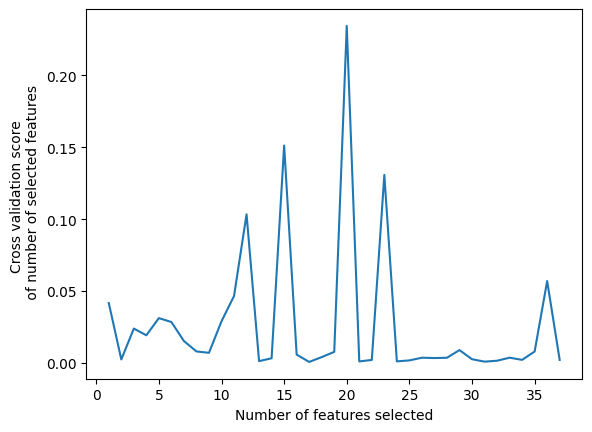

In [283]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])
print('Original features :', X.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.estimator_.feature_importances_) + 1), rfecv.estimator_.feature_importances_)
plt.show()

In [284]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)
print(CV_rfc.best_estimator_)

{'max_depth': 5}
0.7244765227585072
RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)


Mutual Info Regression + Random Forest Regression

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [235]:
# FS + CV
selector = SelectKBest(mutual_info_regression, k=10)
X_train_n = selector.fit_transform(X_train, y_train)
mask = selector.get_support()
print(selector.scores_)
new_features = X_train.columns[mask]
print(new_features) #--Prints selected Features
print(X_train_n.shape) #--Finds shape of selected Features

[0.71061382 0.01458164 0.32905841 0.11686611 0.35416252 0.14350655
 0.31861302 0.08259075 0.08575805 0.33453607 0.0634587  0.33471081
 0.         0.02435694 0.43637281 0.15576102 0.28620783 0.18910477
 0.20255229 0.36490228 0.01391243 0.0325956  0.0037667  0.00643099
 0.05603706 0.25643499 0.08402355 0.         0.         0.
 0.         0.02668235 0.         0.01790369 0.0365718  0.06663232
 0.02094851 0.16159136 0.11057597 0.10123327 0.28542623 0.
 0.06389642 0.15218309 0.04725006 0.00386834 0.00685224 0.
 0.07154206 0.29235262 0.07792532]
Index(['Age', 'ESTIMATE Score', 'Immune Score', 'Purity', 'Stromal Score',
       'Radiation Dose', 'TMZ Treatment Cycles', 'Tumor Grade',
       'IDH and Codeletion Status_IDHwt', 'Cancer Type Detailed_Glioblastoma'],
      dtype='object')
(528, 10)


In [236]:
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

In [246]:
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform(X_test_new)

In [247]:
clf = RandomForestRegressor(n_estimators = 100, max_depth = 4, max_features = 10, criterion = 'absolute_error',bootstrap = True, random_state = 18).fit(X_train_new, y_train)

In [248]:
clf.score(X_test_new, y_test)

0.5733291813055796

Adding GridSearchCV to MI-Regression

In [ ]:
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'random_state' : [18]
}


In [253]:
rf_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
rf_cv.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [255]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'criterion': 'poisson', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}
0.7385566919641015


In [256]:
print(rf_cv.best_estimator_)

RandomForestRegressor(criterion='poisson', max_depth=8, max_features='sqrt',
                      n_estimators=300, random_state=18)


Extreme Gradient Boost Regressor

In [265]:
X = df_encoded.drop(columns=['Overall Survival', 'Overall Survival (months)','3OS'])
y = df_encoded['Overall Survival (months)']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [268]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [269]:
reg.score(X_test, y_test)

0.6844472230991572

In [270]:
# Performing Feature Selection + CV only on Training data to avoid bias.
selector = SelectKBest(mutual_info_regression, k=10) #Mutual info/entropy regression was used as FS because it looks at dependence between variables
X_train_n = selector.fit_transform(X_train, y_train) #--> Transforms X_Train
mask = selector.get_support()
print(selector.scores_)
new_features = X_train.columns[mask]
print(new_features) # Prints the features chosen by mutual info regression
print(X_train_n.shape) # Finds the rows x columns of the transformed X_train

[0.7174826  0.03741669 0.32988984 0.10366445 0.35344896 0.12979067
 0.32022221 0.12958514 0.07239451 0.3324338  0.10372278 0.30238266
 0.         0.03340971 0.46593497 0.19031319 0.30630512 0.17138258
 0.23087529 0.33701393 0.04051092 0.         0.04951566 0.09165474
 0.09157647 0.27341895 0.09279733 0.         0.         0.
 0.01424284 0.02514608 0.         0.01945122 0.         0.04197393
 0.         0.12033029 0.13026326 0.07481844 0.21888995 0.
 0.06023045 0.16210383 0.05070076 0.00241045 0.00151686 0.
 0.04987664 0.30034483 0.08978952]
Index(['Age', 'ESTIMATE Score', 'Immune Score', 'Purity', 'Stromal Score',
       'Radiation Dose', 'TMZ Treatment Cycles', 'Tumor Grade',
       'IDH and Codeletion Status_IDHwt', 'Cancer Type Detailed_Glioblastoma'],
      dtype='object')
(528, 10)


In [271]:
X_train_new = selector.transform(X_train) # --> Transform X Train
X_test_new = selector.transform(X_test) # --> Transforms X Test (makes sure X_test only has the features selected from FS)

In [272]:
# Fitting and building the model
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_new, y_train)

GradientBoostingRegressor(random_state=0)

In [273]:
reg.score(X_test_new, y_test) # Testing the model

0.6759552648985581

In [274]:
#Fine tuning the model for optimal results using GridSearchCV
rf_cv = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=grid, cv= 5)
rf_cv.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [275]:
print(rf_cv.best_params_) #prints best parameters
print(rf_cv.best_score_) #Gets best score from the best parameter

{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}
0.7454523337187933


In [276]:
print(rf_cv.best_estimator_)

GradientBoostingRegressor(max_depth=5, max_features='sqrt', n_estimators=200,
                          random_state=18)
